In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
os.getcwd()

'/Users/ryanfisher/Documents/Springboard/Springboard/Capstone 2/3405-6663-bundle-archive'

In [3]:
movies_credits = pd.read_csv('movies_credits', header=0)
movies_credits.head()

,adult,belongs_to_collection,budget,genres,homepage,movieId,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


# More Data Wrangling

In [4]:
genre_list = []
for i,m in movies_credits.iterrows():
    if str(m['genres'])!='[]':
        genre_list.append(m['genres'].split(",")[1].split(":")[1].split("}")[0].replace("'",""))
    else:
        genre_list.append(None)

In [5]:
collection_list = []
for i,m in movies_credits.iterrows():
    if str(m['belongs_to_collection'])!='nan':
        collection_list.append(m['belongs_to_collection'].split(",")[1].split(":")[1].replace("'",""))
    else:
        collection_list.append(None)

In [6]:
#saving genre to new feature
movies_credits['new_genres'] = genre_list

In [7]:
#saving new collection to new feature
movies_credits['collection'] = collection_list

In [8]:
del movies_credits['genres']

In [9]:
del movies_credits['homepage']

In [10]:
del movies_credits['overview']

In [11]:
del movies_credits['tagline']

In [12]:
del movies_credits['poster_path']

In [13]:
del movies_credits['original_title']

In [14]:
del movies_credits['belongs_to_collection']

In [15]:
import ast

In [16]:
#extracting director
director_list = []
for i,m in movies_credits.iterrows():
    #print(i)
    x = ast.literal_eval(m['crew'])
    temp = {}
    for y in x:
        temp[y['job']] = y['name']
    if 'Director' in temp.keys():
        director_list.append(temp['Director'])
    else:
        director_list.append(None)

In [17]:
#saving extracted director to new feature
movies_credits['director'] = director_list

In [19]:
del movies_credits['production_countries']

In [20]:
del movies_credits['video']

In [21]:
del movies_credits['crew']

In [22]:
del movies_credits['spoken_languages']

In [23]:
del movies_credits['status']

In [25]:
#extracting top 5 actors for each movie
cast_list = []
for i,m in movies_credits.iterrows():
    x = ast.literal_eval(m['cast'])
    #print(x)
    temp = {}
    for y in x:
        temp[y['order']] = y['name']
    for key, val in temp.items(): 
        if int(key) >= 0 and int(key) <= 4: 
            cast_list.append(val)
        else:
            cast_list.append(None)

In [26]:
#splitting new cast list
cast_list = []
for i,m in movies_credits.iterrows():
    x = ast.literal_eval(m['cast'])
    if len(x) > 4:
        y = x[:5]
    else:
        y = x
    temp = ''
    for el in y:
        temp = temp + el['name'] + ','
    temp = temp[:-1]
    cast_list.append(temp)

In [27]:
#testing
cast_list[0].split(',')

['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn']

In [28]:
#saving cast list to cast feature
movies_credits['cast'] = cast_list

In [29]:
movies_credits['cast']

0        Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...
1        Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...
2        Walter Matthau,Jack Lemmon,Ann-Margret,Sophia ...
3        Whitney Houston,Angela Bassett,Loretta Devine,...
4        Steve Martin,Diane Keaton,Martin Short,Kimberl...
                               ...                        
45533              Leila Hatami,Kourosh Tahami,Elham Korda
45534    Angel Aquino,Perry Dizon,Hazel Orencio,Joel To...
45535    Erika Eleniak,Adam Baldwin,Julie du Page,James...
45536    Iwan Mosschuchin,Nathalie Lissenko,Pavel Pavlo...
45537                                                     
Name: cast, Length: 45538, dtype: object

In [30]:
#loading top actors and actresses list
top_actor_list = pd.read_csv('Top_1000_Actors_Actresses.csv', header=0, encoding = "ISO-8859-1")

In [32]:
#creating a list actors by assigning top 500 to list
a_list = top_actor_list.loc[top_actor_list['Position'] <= 500]
a_list_actors = a_list['Name'].tolist()

In [34]:
#creating b list actors by assigning bottom 500 to list
b_list = top_actor_list.loc[top_actor_list['Position'] > 500]
b_list_actors = b_list['Name'].tolist()

In [36]:
#getting count of a list actors for each movie and saving to new feature
a_list_count = []
for i,m in movies_credits.iterrows():
    a_list_match = []
    for x in m['cast'].split(','):
        if x in a_list_actors:
            a_list_match.append(1)
    a_list_count.append(sum(a_list_match))

In [37]:
movies_credits['a_list_sum'] = a_list_count

In [38]:
#getting count of b list actors for each movie and saving to new feature
b_list_count = []
for i,m in movies_credits.iterrows():
    b_list_match = []
    for x in m['cast'].split(','):
        if x in b_list_actors:
            b_list_match.append(1)
    b_list_count.append(sum(b_list_match))

In [39]:
movies_credits['b_list_sum'] = b_list_count

# EDA

In [30]:
movies_credits.describe()

,budget,movieId,popularity,revenue,runtime,vote_average,vote_count
count,4.553800e+04,45538.000000,45535.000000,4.553500e+04,45278.000000,45535.000000,45535.000000
mean,4.223284e+06,108316.948527,2.921916,1.119860e+07,94.128517,5.618232,109.791128
std,1.741372e+07,112403.610181,6.002211,6.428227e+07,38.396184,1.924203,490.920864
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26411.500000,0.386277,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,60012.500000,1.128317,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157170.750000,3.681459,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


/Users/ryanfisher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  import sys


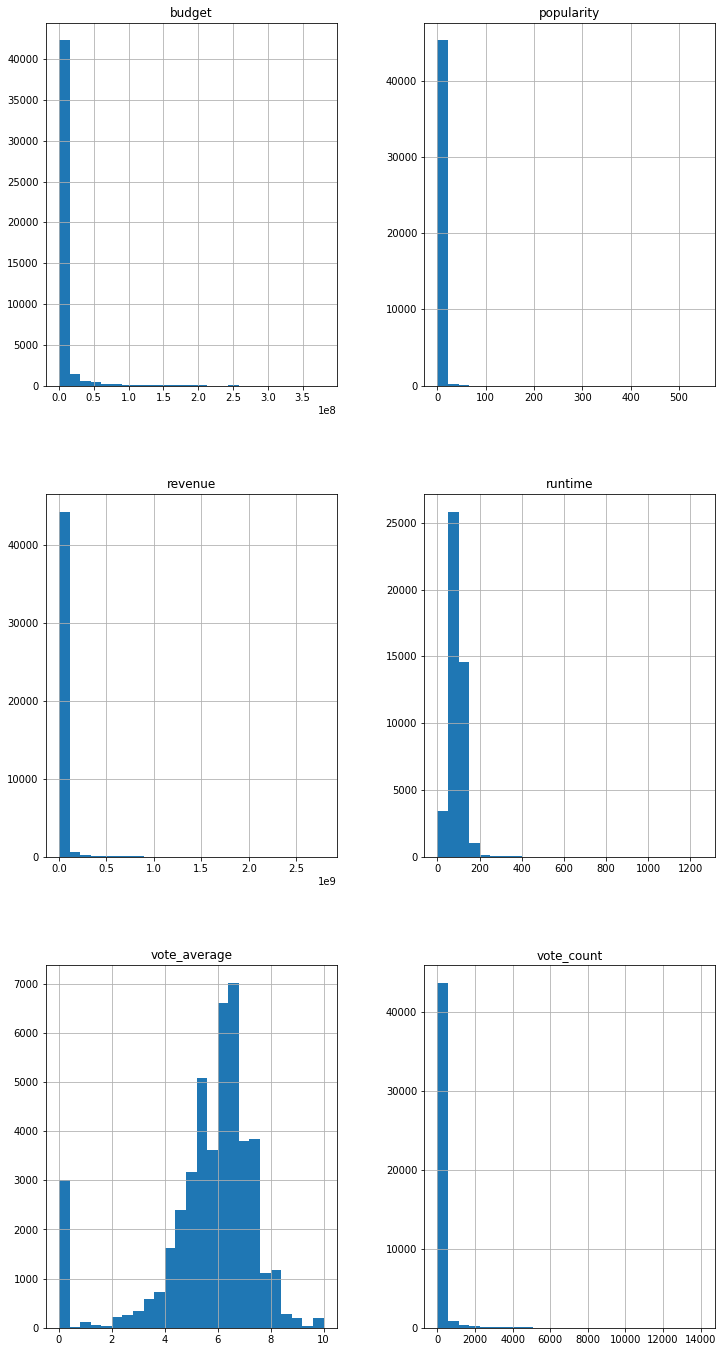

In [18]:


fig, axes = plt.subplots(len(movies_credits.columns)//3, 3, figsize=(12, 24))

i = 0
for triaxis in axes:
    for axis in triaxis:
        movies_credits.hist(column = ['budget','popularity','revenue','runtime','vote_average','vote_count'], 
                            bins = 25, ax=axis)
        i = i+1

In [40]:
movies_credits['budget'] = movies_credits['budget'].astype(float)

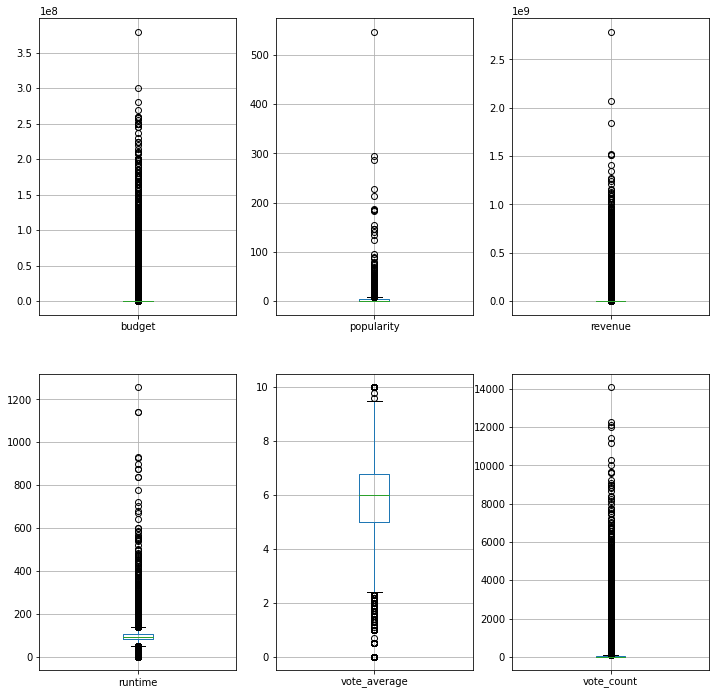

In [49]:
cols = movies_credits.select_dtypes([np.float64]).columns

fig, axes = plt.subplots(len(cols)//3, 3, figsize=(12, 12))

i = 0
for triaxis in axes:
    for axis in triaxis:
        movies_credits.boxplot(column = cols[i],  ax=axis)
        i = i+1

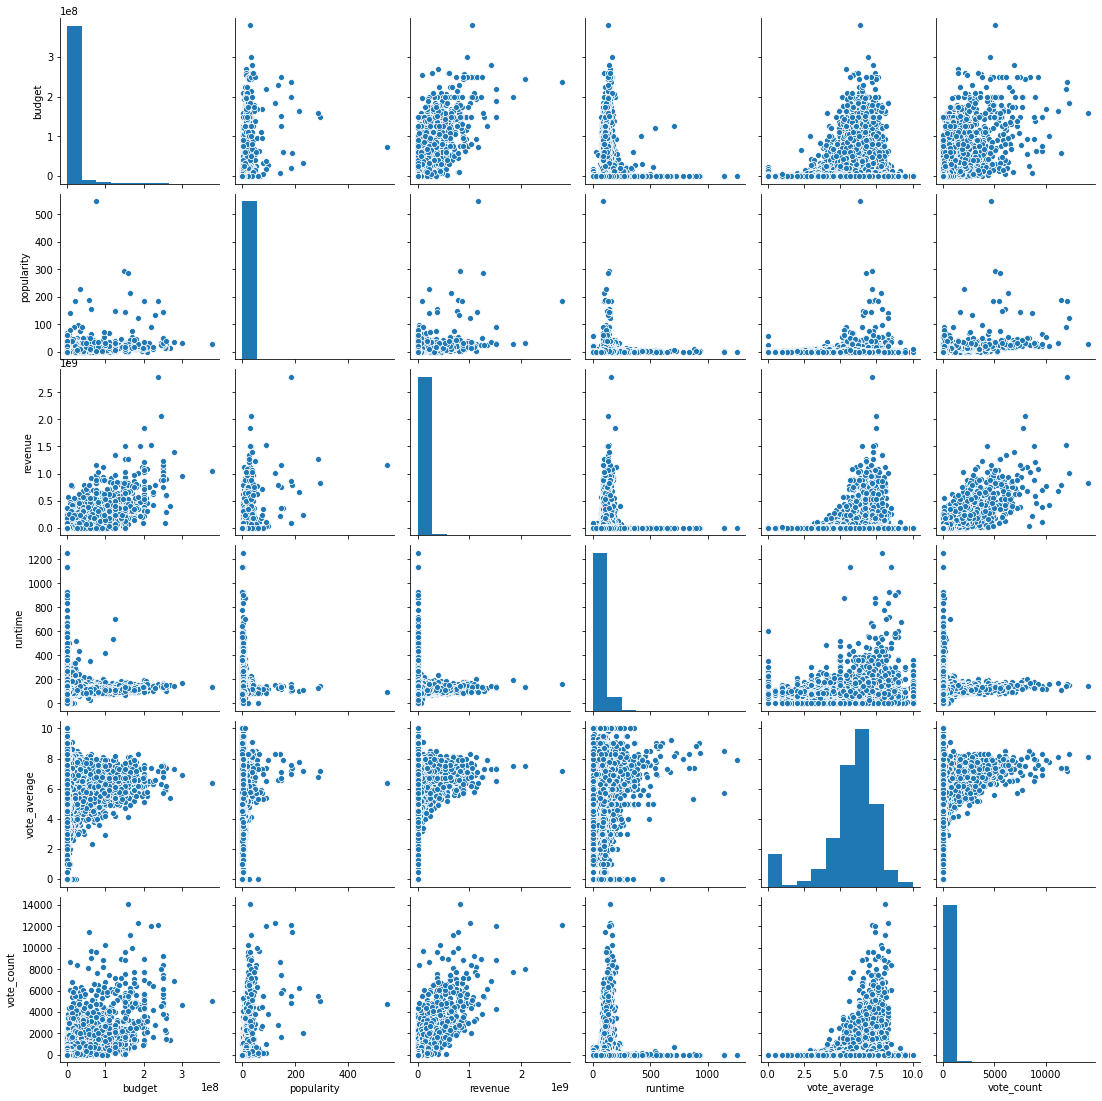

In [42]:
g = sns.pairplot(movies_credits, vars = cols)
plt.show()

In [48]:
#Calculate the correlation coefficients
#subset = dfno[['AdultWeekday','AdultWeekend','daysOpenLastYear','projectedDaysOpen']]
corr = movies_credits.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='Blues')

,adult,budget,movieId,popularity,revenue,runtime,vote_average,vote_count,a_list_sum,b_list_sum
adult,1.000000,-0.000000,0.010000,-0.000000,-0.000000,-0.010000,-0.010000,-0.000000,-0.010000,-0.010000
budget,-0.000000,1.000000,-0.100000,0.450000,0.770000,0.130000,0.070000,0.680000,0.350000,0.330000
movieId,0.010000,-0.100000,1.000000,-0.080000,-0.070000,-0.120000,-0.170000,-0.060000,-0.190000,-0.120000
popularity,-0.000000,0.450000,-0.080000,1.000000,0.510000,0.130000,0.150000,0.560000,0.280000,0.290000
revenue,-0.000000,0.770000,-0.070000,0.510000,1.000000,0.100000,0.080000,0.810000,0.290000,0.240000
runtime,-0.010000,0.130000,-0.120000,0.130000,0.100000,1.000000,0.160000,0.110000,0.170000,0.120000
vote_average,-0.010000,0.070000,-0.170000,0.150000,0.080000,0.160000,1.000000,0.120000,0.110000,0.080000
vote_count,-0.000000,0.680000,-0.060000,0.560000,0.810000,0.110000,0.120000,1.000000,0.310000,0.270000
a_list_sum,-0.010000,0.350000,-0.190000,0.280000,0.290000,0.170000,0.110000,0.310000,1.000000,0.230000
b_list_sum,-0.010000,0.330000,-0.120000,0.290000,0.240000,0.120000,0.080000,0.270000,0.230000,1.000000
